PART A


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, accuracy_score
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DMW expt2/kag_risk_factors_cervical_cancer.csv')

In [ ]:
# df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df = df.replace('?', np.nan)
# df = df.replace('no', 0)
# df = df.replace('yes', 1)
# df.drop(["Gender"], axis=1, inplace=True)
# df.drop(df[df.Type=='I'].index, inplace = True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,41,3.0,17.0,4.0,0.0,0.0,0.0,1.0,10.0,0.0,...,21.0,21.0,0,0,0,0,0,0,0,0
1,40,1.0,18.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,...,2.0,2.0,0,0,0,0,0,1,1,1
2,35,3.0,17.0,4.0,0.0,0.0,0.0,1.0,7.0,1.0,...,19.0,19.0,0,0,0,0,0,0,0,0
3,35,3.0,20.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,0,0,0,0,0,0,0,0
4,35,3.0,17.0,6.0,1.0,13.0,2.6,1.0,7.0,0.0,...,12.0,12.0,0,0,0,0,0,1,0,0
5,36,2.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
6,30,5.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,...,11.0,11.0,0,0,0,0,0,0,1,0
7,30,3.0,19.0,2.0,0.0,0.0,0.0,1.0,9.0,0.0,...,9.0,9.0,0,0,0,0,0,0,0,0
8,30,3.0,14.0,3.0,0.0,0.0,0.0,1.0,12.0,1.0,...,7.0,7.0,0,0,0,0,0,0,1,0
9,29,4.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,8.0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop(['Biopsy'], axis=1)
y = df['Biopsy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_preds = nb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_preds))

[[7 9]
 [0 2]]


In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61        16
           1       0.18      1.00      0.31         2

    accuracy                           0.50        18
   macro avg       0.59      0.72      0.46        18
weighted avg       0.91      0.50      0.58        18



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_preds = dtc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_preds))

[[15  1]
 [ 0  2]]


In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.67      1.00      0.80         2

    accuracy                           0.94        18
   macro avg       0.83      0.97      0.88        18
weighted avg       0.96      0.94      0.95        18



PART B (except 4 more datasets ka part)

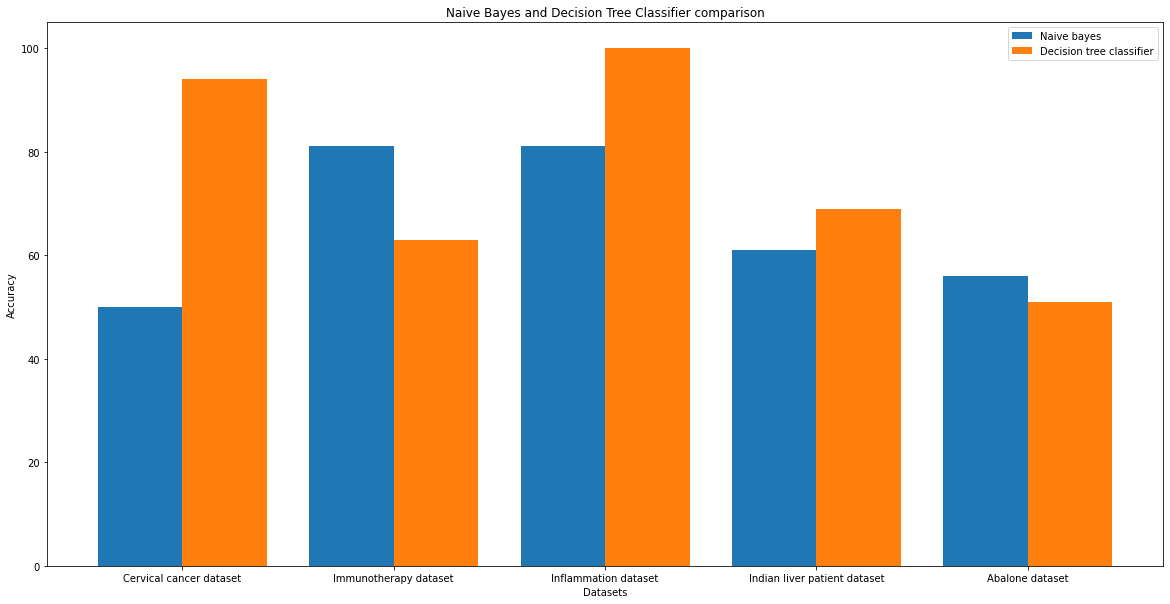

In [ ]:
import matplotlib.pyplot as plt 
  
X = ['Cervical cancer dataset','Immunotherapy dataset','Inflammation dataset','Indian liver patient dataset', 'Abalone dataset']
nb_acc = [50,81,81,61,56]
dtc_acc = [94,63,100,69,51]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(20,10))
plt.bar(X_axis - 0.2, nb_acc, 0.4, label = 'Naive bayes')
plt.bar(X_axis + 0.2, dtc_acc, 0.4, label = 'Decision tree classifier')

plt.xticks(X_axis, X)
plt.xlabel("Datasets")
plt.ylabel("Accuracy")
plt.title("Naive Bayes and Decision Tree Classifier comparison")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


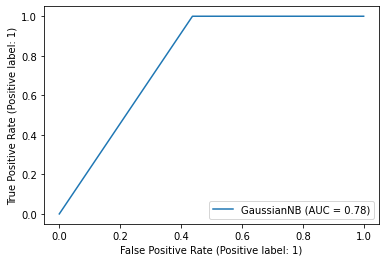

In [ ]:
plot_roc_curve(nb, X_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


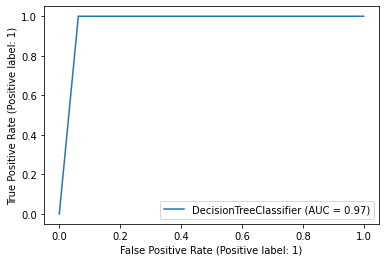

In [ ]:
plot_roc_curve(dtc, X_test, y_test) 

PART C

In [ ]:
list1 = []
kf = KFold(n_splits=4)
for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  nb = GaussianNB()
  nb.fit(X_train, y_train)
  y_preds = nb.predict(X_test)
  confusion_matrix(y_test, y_preds)
  list1.append(accuracy_score(y_test, y_preds))
result1=sum(list1)/len(list1)
print(list1)

TRAIN: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58] TEST: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 45 46 47 48 49 50 51 52 53 54 55 56 57 58] TEST: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44] TEST: [45 46 47 48 49 50 51 52 53 54 55 56 57 58]
[0.6666666666666666, 0.8, 0.4, 0.5]


In [ ]:
bnb = BaggingClassifier(base_estimator=nb,n_estimators=10, random_state=0)
bnb.fit(X_train, y_train)
y_preds = bnb.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[10  1]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.00      0.00      0.00         3

    accuracy                           0.71        14
   macro avg       0.38      0.45      0.42        14
weighted avg       0.60      0.71      0.65        14



In [ ]:
bonb = AdaBoostClassifier(base_estimator=nb,n_estimators=10, random_state=0)
bonb.fit(X_train, y_train)
y_preds = bonb.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[11  0]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       0.00      0.00      0.00         3

    accuracy                           0.79        14
   macro avg       0.39      0.50      0.44        14
weighted avg       0.62      0.79      0.69        14



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train, y_train)
y_preds = rfc.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[11  0]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       0.00      0.00      0.00         3

    accuracy                           0.79        14
   macro avg       0.39      0.50      0.44        14
weighted avg       0.62      0.79      0.69        14



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
